In [7]:
library(prophet)
library(basedosdados, quietly = True)

In [9]:
suppressMessages(set_billing_id('projeto-analytics-314021'))
suppressMessages(query <- "SELECT * FROM `basedosdados.br_seeg_emissoes.brasil`")
df <- read_sql(query)

In [22]:
anos <- as.data.frame(df[1])
nivel_1 <- list()

contador = 1
for(i in 1:454850){
    if (!df['nivel_1'][i,] %in% nivel_1) {
        nivel_1[contador] <- df['nivel_1'][i,]
        contador <- contador + 1
    }
  }

nivel_1
ds <- seq(as.Date("1970/1/1"), as.Date("2019/1/1"), by = "year")

[[1]]
[1] "Agropecuária"

[[2]]
[1] "Energia"

[[3]]
[1] "Mudança de Uso da Terra e Floresta"

[[4]]
[1] "Processos Industriais"

[[5]]
[1] "Resíduos "

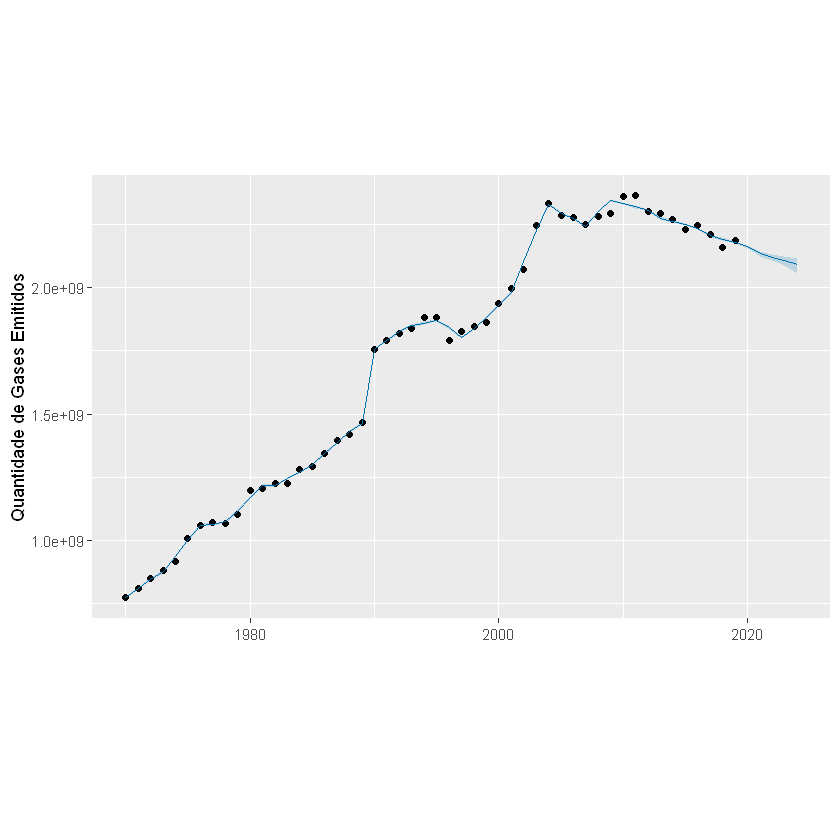

In [27]:
## Agropecuária

emissoes <- as.list(rep(0, 50))
agropecuaria <- data.frame(ds) 

for(i in 1:454850){
    if(df['nivel_1'][i,] == 'Agropecuária' && !apply(df['emissao'][i,], 1, is.na)) {
      indice = match(toString(anos[i,]), format(agropecuaria['ds'][,1], format = "%Y"))
      emissoes[indice] <- emissoes[indice] + df['emissao'][i,]
  }
}
agropecuaria$y <- emissoes

m <- prophet(agropecuaria, changepoint.prior.scale = 0.1 , daily.seasonality = F, weekly.seasonality = F, interval.width = 0.2, seasonality.mode = "multiplicative")
future <- make_future_dataframe(m, periods = 5, freq = 'year')
predicao <- predict(m, future)
plot(m, predicao, ylab = "Quantidade de Gases Emitidos", xlab = "")